In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# These two packages are required first and may prompt us to restart runtime so we bring them first
!pip install ultralytics
!pip install roboflow

In [1]:
import matplotlib.image as pltimg
import matplotlib.pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO
from PIL import Image
import pandas as pd
import numpy as np
import os

### Let train Raw Yolov8 Model

In [ ]:
# %mkdir /content/drive/MyDrive/Raw_Yolo
# !git clone https://github.com/ultralytics/ultralytics
%cd /content/drive/MyDrive/Raw_Yolo/ultralytics

### WORKING WITH DATASET 1

ROBOFLOW MASK WEARING DATA IOS Data_Source:
https://universe.roboflow.com/mohamed-traore-2ekkp/roboflow-mask-wearing-ios/dataset/16#

The version name of this data is "raw-images_updated" with Version ID 16. The data was generated on Dec 2, 2022 and has an annotation Group "mask"

In [ ]:
%cd /content/drive/MyDrive/Raw_Yolo
rf = Roboflow(api_key="Gyx0YkuEsC8WIqNFC6oD")
project = rf.workspace("mohamed-traore-2ekkp").project("roboflow-mask-wearing-ios")
dataset = project.version(16).download("yolov8")

#### Lets view the images at glance

In [ ]:
train_images = os.listdir('/content/drive/MyDrive/Raw_Yolo/Roboflow-Mask-Wearing-iOS-16/train/images')
image_path = '/content/drive/MyDrive/Raw_Yolo/Roboflow-Mask-Wearing-iOS-16/train/images'

for i in range(3):
  plt.subplot(1,3, i+1)
  image = Image.open(os.path.join(image_path,train_images[i+20]))
  image = np.array(image.resize((512,512)))
  plt.imshow(image)

In [ ]:
%cd /content/drive/MyDrive/YoloFromScratch
!git clone https://github.com/ultralytics/ultralytics
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics


### TRAINING FROM SCRATCH USING THE RAW YOLOV8 ARCHITECTURE

In [7]:
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics
model_scratch_theirs = YOLO('yolov8n.yaml')
model_scratch_theirs.train(data='/content/drive/MyDrive/YoloFromScratch/ultralytics/Roboflow-Mask-Wearing-iOS-16/data.yaml', dropout=0.2, batch=8, patience=5, device=0)
model_scratch_theirs.val(split='test')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

/content/drive/MyDrive/YoloFromScratch/ultralytics


YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Ultralytics YOLOv8.0.87 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/YoloFromScratch/ultralytics/Roboflow-Mask-Wearing-iOS-16/data.yaml, epochs=100, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augm

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f6f187408b0>
fitness: 0.5725711316042488
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.51732,     0.56532])
names: {0: 'Mask', 1: 'NO-Mask'}
plot: True
results_dict: {'metrics/precision(B)': 0.8918187518134678, 'metrics/recall(B)': 0.784114875905401, 'metrics/mAP50(B)': 0.8538145083542297, 'metrics/mAP50-95(B)': 0.5413218675209175, 'fitness': 0.5725711316042488}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.2400694177725774, 'inference': 3.93253031784926, 'loss': 0.0020566025400549416, 'postprocess': 1.2377755751777793}

In [7]:
### TRAINING FROM SCRATCH USING OUR OWN MODIFIED ARCHITECTURE

In [14]:
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics
model_scratch_Ours = YOLO('/content/drive/MyDrive/YoloFromScratch/ultralytics/YOLOV8-Ours.yaml') # note we have edited the yolov8n.yaml
model_scratch_Ours.train(data='/content/drive/MyDrive/YoloFromScratch/ultralytics/Roboflow-Mask-Wearing-iOS-16/data.yaml', dropout=0.2, batch=8, patience=5, device=0)
model_scratch_Ours.val(split='test')


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  3   1116672  ultralytics.nn.modules.C2f                   [256, 256, 3, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

/content/drive/MyDrive/YoloFromScratch/ultralytics


YOLOV8-Ours summary: 281 layers, 14929398 parameters, 14929382 gradients, 37.1 GFLOPs

Ultralytics YOLOv8.0.87 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YoloFromScratch/ultralytics/YOLOV8-Ours.yaml, data=/content/drive/MyDrive/YoloFromScratch/ultralytics/Roboflow-Mask-Wearing-iOS-16/data.yaml, epochs=100, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f6f1819b8e0>
fitness: 0.6086001848290403
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.5406,     0.61373])
names: {0: 'Mask', 1: 'NO-Mask'}
plot: True
results_dict: {'metrics/precision(B)': 0.9223769940160984, 'metrics/recall(B)': 0.8497959993925244, 'metrics/mAP50(B)': 0.891514740180444, 'metrics/mAP50-95(B)': 0.57716523423444, 'fitness': 0.6086001848290403}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 0.30284328512383024, 'inference': 4.397547341943756, 'loss': 0.0017542180007066182, 'postprocess': 0.9941402166516478}

### WORKING WITH DATASET TWO
Real-time Face Mask Detection and Validation System Dataset source is: https://universe.roboflow.com/group-tbd/real-time-face-mask-detection-and-validation-system-dataset/health

Data details:
The number of images indicating peope without_mask is 1,633, people with_mask is
1,457 and people who mask_weared_incorrect is 1,200


In [ ]:
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics
rf = Roboflow(api_key="Gyx0YkuEsC8WIqNFC6oD")
project = rf.workspace("group-tbd").project("real-time-face-mask-detection-and-validation-system-dataset")
dataset = project.version(4).download("yolov8")

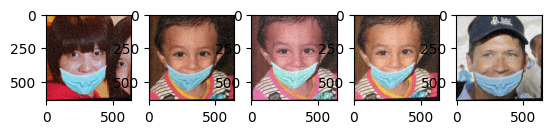

In [30]:
train_dir = os.listdir('/content/drive/MyDrive/YoloFromScratch/ultralytics/Real-time-Face-Mask-Detection-and-Validation-System-Dataset-4/train/images')
path = '/content/drive/MyDrive/YoloFromScratch/ultralytics/Real-time-Face-Mask-Detection-and-Validation-System-Dataset-4/train/images'
for i in range(5):
  plt.subplot(1,5,i+1)
  image = Image.open(os.path.join(path,train_dir[i+5]))
  plt.imshow(image)

In [31]:
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics
model_scratch_theirs = YOLO('yolov8n.yaml')
model_scratch_theirs.train(data='/content/drive/MyDrive/YoloFromScratch/ultralytics/Real-time-Face-Mask-Detection-and-Validation-System-Dataset-4/data.yaml', dropout=0.2, batch=8, patience=5, device=0)
model_scratch_theirs.val(split='test')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

/content/drive/MyDrive/YoloFromScratch/ultralytics


Ultralytics YOLOv8.0.87 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/YoloFromScratch/ultralytics/Real-time-Face-Mask-Detection-and-Validation-System-Dataset-4/data.yaml, epochs=100, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, re

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f6b2506be80>
fitness: 0.5999276511106331
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.8398,     0.43755,     0.43908])
names: {0: 'improper_mask', 1: 'no_mask', 2: 'proper_mask'}
plot: True
results_dict: {'metrics/precision(B)': 0.9174515725245845, 'metrics/recall(B)': 0.7546994469426611, 'metrics/mAP50(B)': 0.8499780578524185, 'metrics/mAP50-95(B)': 0.572144272583768, 'fitness': 0.5999276511106331}
save_dir: PosixPath('runs/detect/val3')
speed: {'preprocess': 0.5886838242814347, 'inference': 3.3835462621740393, 'loss': 0.0021083934887035473, 'postprocess': 2.8507541965793917}

#### TRAINING FROM SCRATCH WITH OUR OWN MODIFIED ARCHITECTURE

In [32]:
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics
model_scratch_Ours = YOLO('/content/drive/MyDrive/YoloFromScratch/ultralytics/YOLOV8-Ours.yaml')
model_scratch_Ours.train(data='/content/drive/MyDrive/YoloFromScratch/ultralytics/Real-time-Face-Mask-Detection-and-Validation-System-Dataset-4/data.yaml', dropout=0.2, batch=8, patience=5, device=0)
model_scratch_Ours.val(split='test')


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  3   1116672  ultralytics.nn.modules.C2f                   [256, 256, 3, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

/content/drive/MyDrive/YoloFromScratch/ultralytics


YOLOV8-Ours summary: 281 layers, 14929398 parameters, 14929382 gradients, 37.1 GFLOPs

New https://pypi.org/project/ultralytics/8.0.88 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.87 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YoloFromScratch/ultralytics/YOLOV8-Ours.yaml, data=/content/drive/MyDrive/YoloFromScratch/ultralytics/Real-time-Face-Mask-Detection-and-Validation-System-Dataset-4/data.yaml, epochs=100, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, h

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f6fa337baf0>
fitness: 0.6022476769427085
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.84275,      0.4491,     0.42843])
names: {0: 'improper_mask', 1: 'no_mask', 2: 'proper_mask'}
plot: True
results_dict: {'metrics/precision(B)': 0.8939901778074159, 'metrics/recall(B)': 0.7823496017774506, 'metrics/mAP50(B)': 0.8616101393750398, 'metrics/mAP50-95(B)': 0.5734296255613384, 'fitness': 0.6022476769427085}
save_dir: PosixPath('runs/detect/val4')
speed: {'preprocess': 0.5677674267743085, 'inference': 4.797477979917784, 'loss': 0.0018106924520956504, 'postprocess': 2.769233085013725}

### WORKING WITH DATASET THREE
https://universe.roboflow.com/gilles-degue/reconnaissance-de-masque/dataset/3

In [33]:
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics
rf = Roboflow(api_key="Gyx0YkuEsC8WIqNFC6oD")
project = rf.workspace("gilles-degue").project("reconnaissance-de-masque")
dataset = project.version(3).download("yolov8")

/content/drive/MyDrive/YoloFromScratch/ultralytics
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.87, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to reconnaissance-de-masque-3 in yolov8:: 100%|██████████| 3834/3834 [00:16<00:00, 236.10it/s]


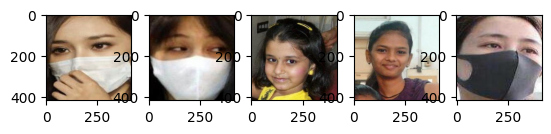

In [34]:
train_dir = os.listdir('/content/drive/MyDrive/YoloFromScratch/ultralytics/reconnaissance-de-masque-3/train/images')
path = '/content/drive/MyDrive/YoloFromScratch/ultralytics/reconnaissance-de-masque-3/train/images'
for i in range(5):
  plt.subplot(1,5,i+1)
  image = Image.open(os.path.join(path,train_dir[i+5]))
  plt.imshow(image)

In [2]:
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics
model_scratch_theirs = YOLO('yolov8n.yaml')
model_scratch_theirs.train(data='/content/drive/MyDrive/YoloFromScratch/ultralytics/reconnaissance-de-masque-3/data.yaml', dropout=0.2, batch=8, patience=5, device=0)
model_scratch_theirs.val(split='test')

/content/drive/MyDrive/YoloFromScratch/ultralytics



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f30f20df0d0>
fitness: 0.6032320526056529
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.42709,     0.72349])
names: {0: 'mask', 1: 'sans mask'}
plot: True
results_dict: {'metrics/precision(B)': 0.8558316251602531, 'metrics/recall(B)': 0.7948164874756041, 'metrics/mAP50(B)': 0.8546835066177387, 'metrics/mAP50-95(B)': 0.5752930021598657, 'fitness': 0.6032320526056529}
save_dir: PosixPath('runs/detect/val7')
speed: {'preprocess': 0.5874890547532301, 'inference': 2.56807009379069, 'loss': 0.002087079561673678, 'postprocess': 1.1545902643448267}

#### TRAINING FROM SCRATCH WITH OUR OWN MODIFIED ARCHITECTURE

In [3]:
%cd /content/drive/MyDrive/YoloFromScratch/ultralytics
model_scratch_Ours = YOLO('/content/drive/MyDrive/YoloFromScratch/ultralytics/YOLOV8-Ours.yaml')
model_scratch_Ours.train(data='/content/drive/MyDrive/YoloFromScratch/ultralytics/reconnaissance-de-masque-3/data.yaml', dropout=0.2, batch=8, patience=5, device=0)
model_scratch_Ours.val(split='test')


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              


/content/drive/MyDrive/YoloFromScratch/ultralytics


  6                  -1  3   1116672  ultralytics.nn.modules.C2f                   [256, 256, 3, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  8                  -1  2   3149824  ultralytics.nn.modules.C2f                   [512, 512, 2, True]           
  9                  -1  1    656896  ultralytics.nn.modules.SPPF                  [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.Concat                [1]                           
 12                  -1  2    919552  ultralytics.nn.modules.C2f                   [768, 256, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.Concat                [1]  

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f306e62d820>
fitness: 0.6288322588875144
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.46145,     0.73656])
names: {0: 'mask', 1: 'sans mask'}
plot: True
results_dict: {'metrics/precision(B)': 0.8868163304402568, 'metrics/recall(B)': 0.8495166291594001, 'metrics/mAP50(B)': 0.8972386562540086, 'metrics/mAP50-95(B)': 0.5990093258467928, 'fitness': 0.6288322588875144}
save_dir: PosixPath('runs/detect/val8')
speed: {'preprocess': 0.5744322752341245, 'inference': 3.263073701124925, 'loss': 0.0017740787603916267, 'postprocess': 0.9921709696451821}